In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(32)

In [40]:
n_samples=1000
feature_1 = np.random.normal(loc=20, scale=4, size=n_samples)
feature_2 = np.random.normal(loc=15, scale=5, size=n_samples)

noise = np.random.normal(loc=0, scale=1, size=n_samples)
output = 3*feature_1 + 2*feature_2 + noise

data = pd.DataFrame({'feature1':feature_1,
                    'feature2':feature_2,
                    'output':output})

data.head()

,feature1,feature2,output
0,17.140189,17.154114,84.735739
1,22.332391,2.312515,71.953950
2,19.512878,13.469060,84.999360
3,10.212818,21.131050,75.226829
4,19.066314,2.140921,62.026513


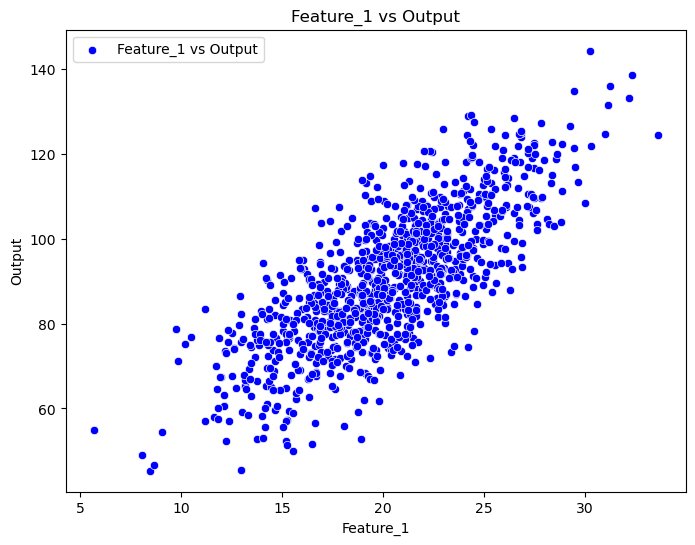

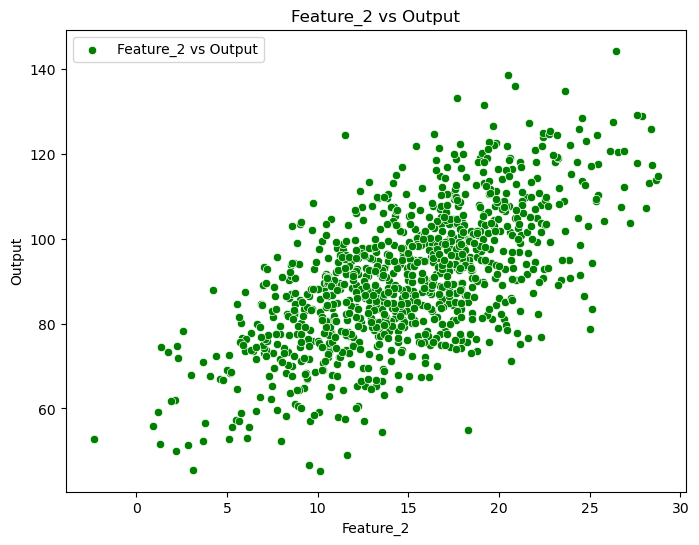

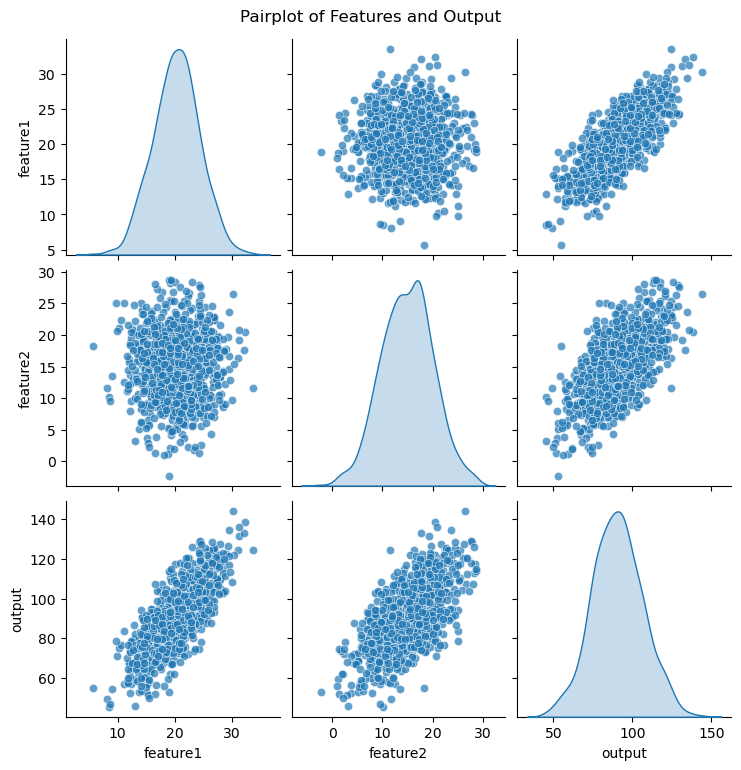

In [41]:
# Scatterplot: Feature_1 vs Output
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['feature1'], y=data['output'], color='blue', label='Feature_1 vs Output')
plt.title('Feature_1 vs Output')
plt.xlabel('Feature_1')
plt.ylabel('Output')
plt.legend()
plt.show()

# Scatterplot: Feature_2 vs Output
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['feature2'], y=data['output'], color='green', label='Feature_2 vs Output')
plt.title('Feature_2 vs Output')
plt.xlabel('Feature_2')
plt.ylabel('Output')
plt.legend()
plt.show()

# Pairplot to visualize all pairwise relationships
sns.pairplot(data, kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Features and Output', y=1.02)
plt.show()

In [46]:
#n_training = 700
#n_testing = n_samples - n_training
train_data = data[:701]
test_data = data[701:]

In [51]:
# parameters: b1, b2, intercept
Y_mean = train_data['output'].mean()

#b1 calulations
X1_mean = train_data['feature1'].mean()

#X1_numerator is CoVariance(Output,feature1)
X1_numerator = sum((train_data['feature1']- X1_mean)*(train_data['output']- Y_mean)) / (n_samples-1)
#X1_denominator is CoVariance(feature1, feature1)
X1_denominator = sum((train_data['feature1']-X1_mean)**2) / (n_samples-1)
#parameter b1 becomes CoVariance(Output,feature1) / CoVariance(feature1, feature1)
b1 = X1_numerator/X1_denominator  


#b2 calculations
X2_mean = train_data['feature2'].mean()
#X2_numerator is CoVariance(Output,feature2)
X2_numerator = sum((train_data['feature2']- X2_mean)*(train_data['output']- Y_mean)) / (n_samples-1)
#X2_denominator is CoVariance(feature2, feature2)
X2_denominator = sum((train_data['feature2']-X2_mean)**2) / (n_samples-1)
#parameter b2 becomes CoVariance(Output,feature2) / CoVariance(feature2, feature2)
b2= X2_numerator/X2_denominator

intercept = Y_mean- (b1*X1_mean + b2*X2_mean)


X1_numerator,b1, X2_numerator,b2, intercept

(34.77571182874938,
 3.0122479509366236,
 36.48197162590201,
 2.009201605101614,
 -0.41454053791193246)

In [52]:
from sklearn.linear_model import LinearRegression

In [55]:
X = train_data[['feature1', 'feature2']].values  # Input features
y = train_data['output']

In [56]:
model = LinearRegression()
model.fit(X, y)

# Retrieve model parameters
coefficients = model.coef_  # Coefficients for Feature_1 and Feature_2
intercept = model.intercept_  # Intercept

coefficients, intercept

(array([2.98827536, 1.98627035]), 0.41022288590389167)